In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler

import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv("co2.csv")
print(df)

       Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6

## 1. Basic Info

In [4]:

print(df.describe())

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000         

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
print(df.nunique())

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64


## 2. check for missing values

In [7]:

print(df.isnull().sum())


Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


## 3. Categorical Data


In [12]:

categorical_cols = ['Make', 'Model', 'Vehicle Class', 'Fuel Type', 'Transmission']

for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")



Value counts for Make:
Make
FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: count, dtype: int64


Value counts for Model:
Model
F-150 FFV 4X4           32
F-150

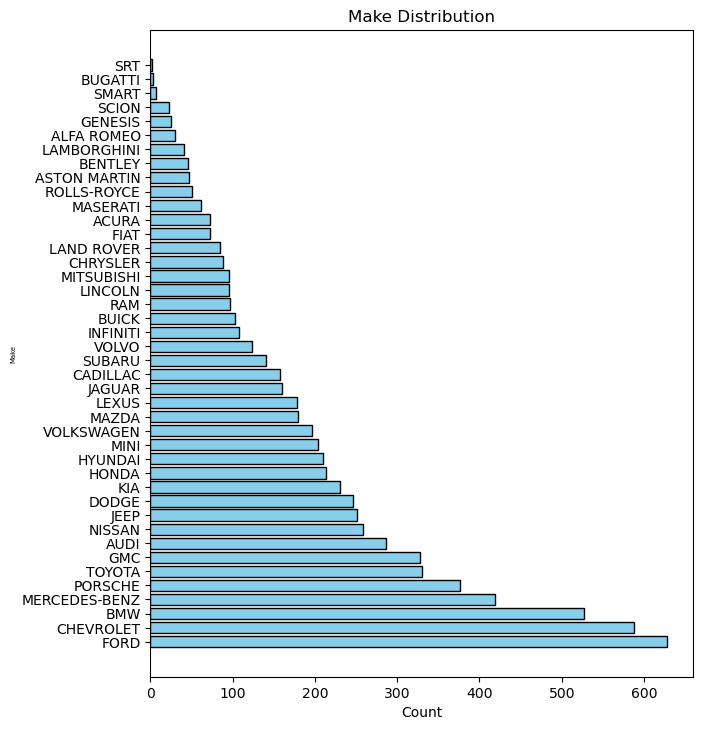

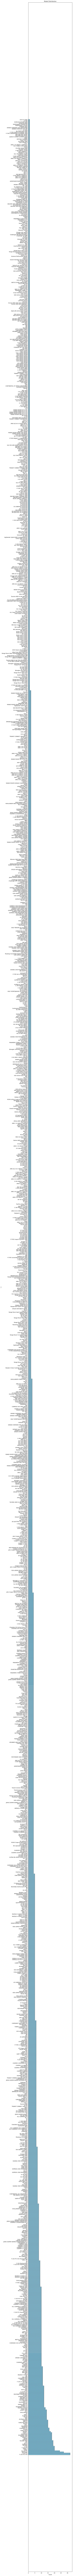

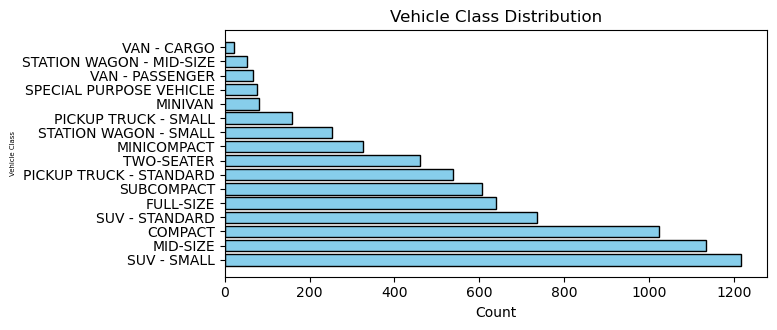

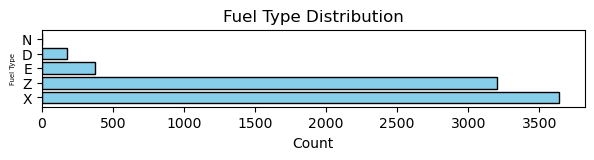

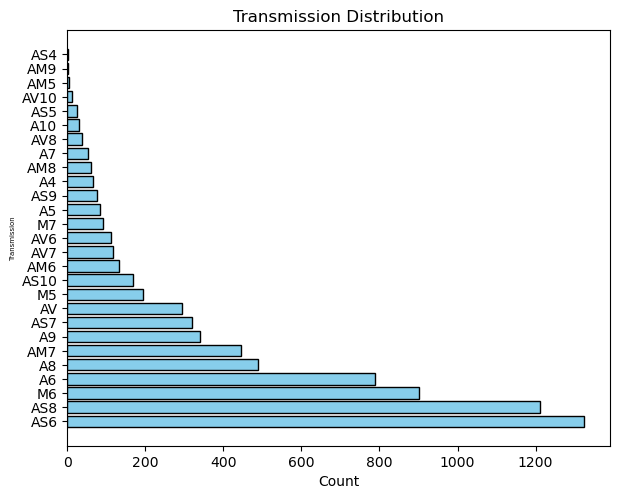

In [85]:
# Visualizing the distribution of 'Vehicle Class'
for col in categorical_cols:


    counts = df[col].value_counts()
    
    plt.figure(figsize=(7, len(counts) * 0.2))
    plt.barh(counts.index, counts.values, color='skyblue', edgecolor='black')
    plt.title(f"{col} Distribution")
    plt.xlabel("Count")
    plt.ylabel(col, fontsize=5)
    plt.show()

    


## 4.Numeric Data

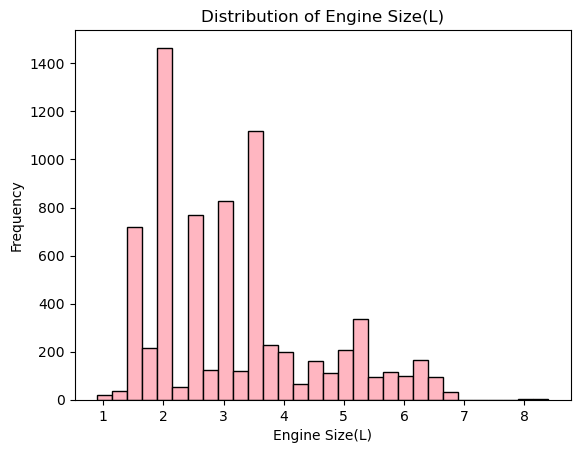

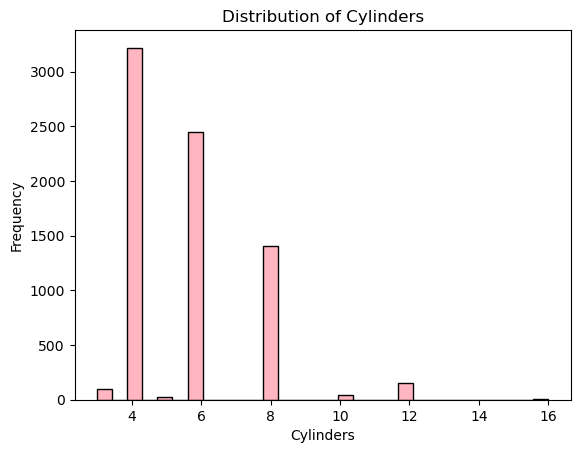

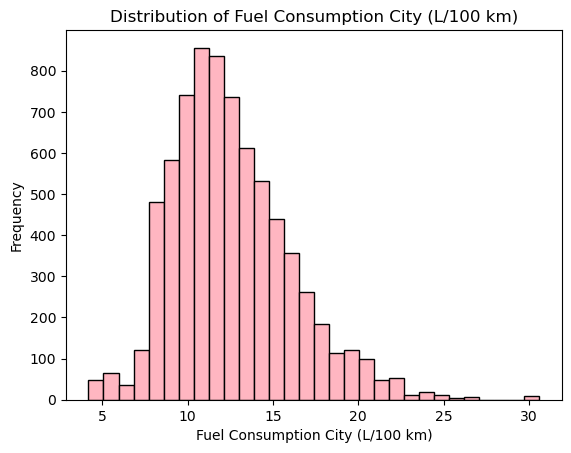

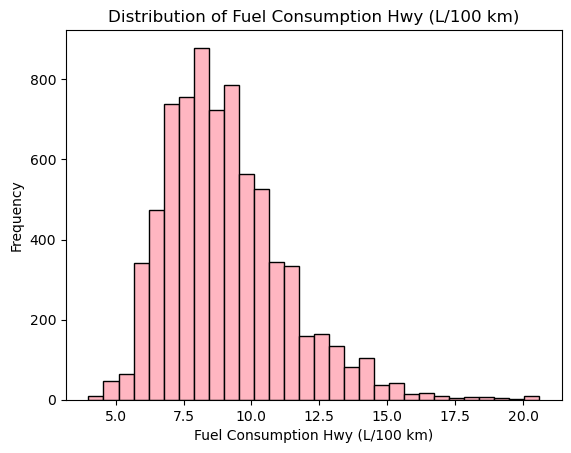

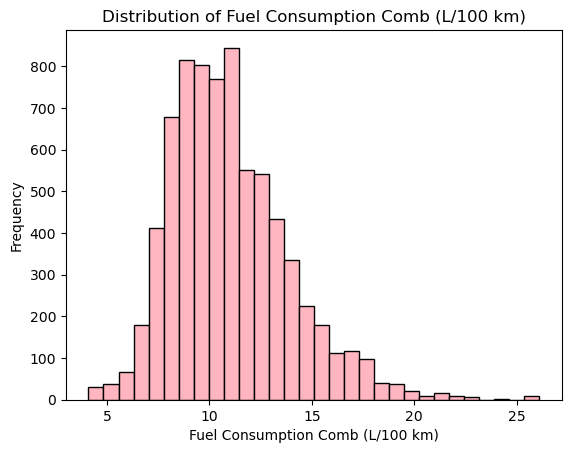

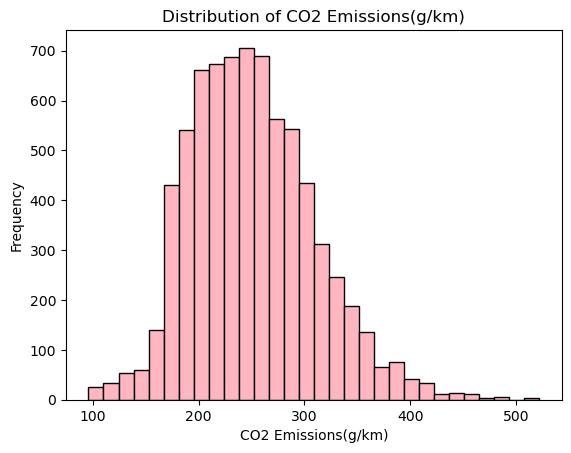

In [80]:
numeric_cols = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
                'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
                'CO2 Emissions(g/km)']

for col in numeric_cols:
    plt.hist(df[col], bins=30, color='lightpink', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [54]:
grouped_data = df.groupby(['Fuel Type', 'CO2 Emissions(g/km)']).size().reset_index(name='Count')
print(grouped_data)


    Fuel Type  CO2 Emissions(g/km)  Count
0           D                  169      1
1           D                  170      1
2           D                  172      2
3           D                  175      2
4           D                  176      1
..        ...                  ...    ...
739         Z                  476      1
740         Z                  485      1
741         Z                  487      1
742         Z                  493      2
743         Z                  522      3

[744 rows x 3 columns]


# Observation
Most vehicles are optimized for moderate fuel consumption and emissions, with fewer vehicles at the extremes.

## 5. Boxplot to detect outliers

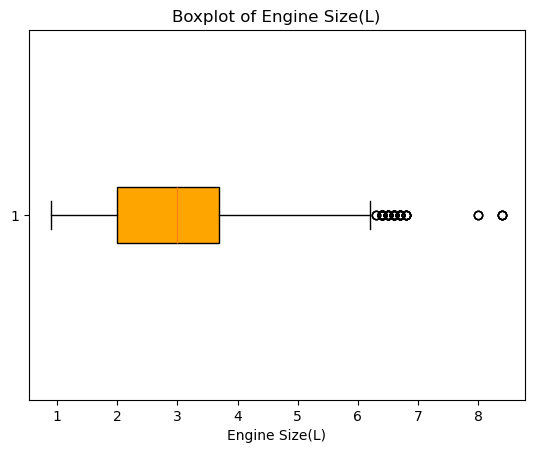

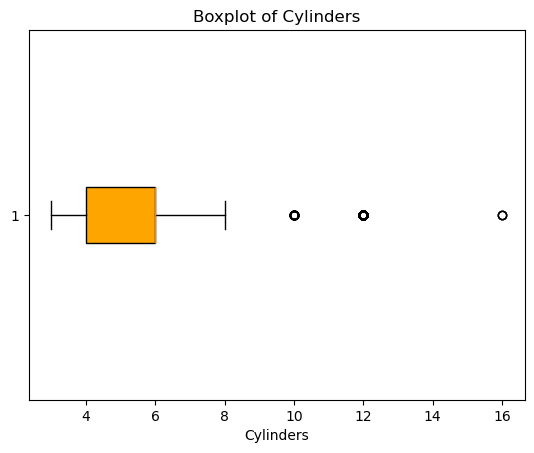

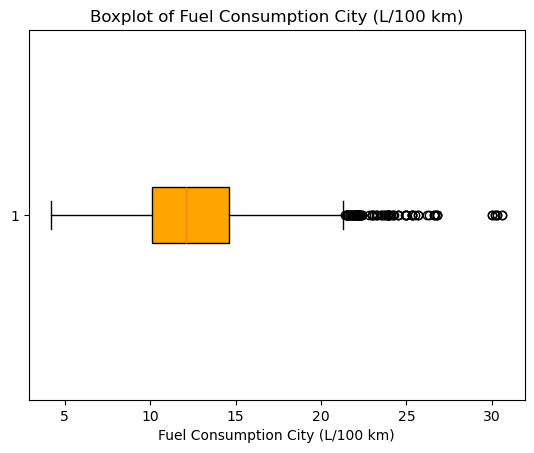

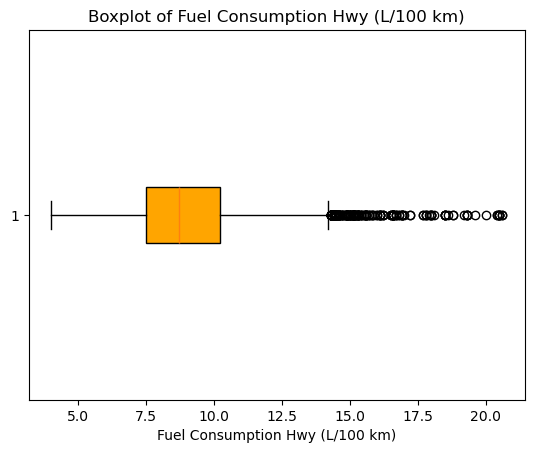

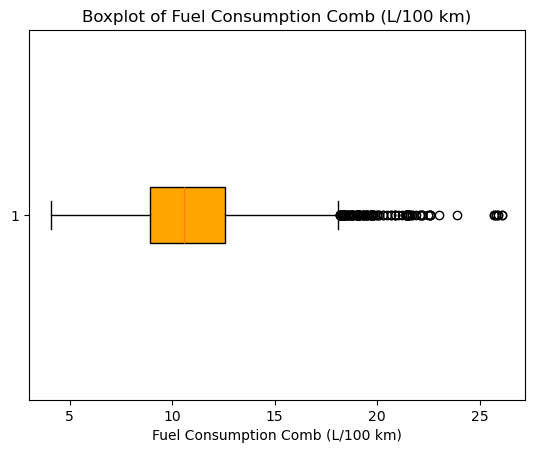

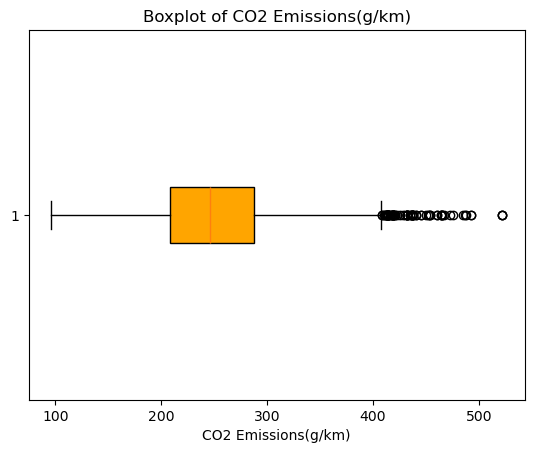

In [81]:

for col in numeric_cols:
    plt.boxplot(df[col], vert=False, patch_artist=True, boxprops=dict(facecolor='orange', color='black'))
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

    # pink line is median and the blue box represents data (50%) around the median. Hollow circles are outliers

## 6. Correlation matrix (Numeric)
A correlation matrix is a table that displays the correlation coefficients between multiple variables in a dataset.

1: Perfect positive correlation (as one variable increases, the other increases).

0: No correlation (variables are independent).

-1: Perfect negative correlation (as one variable increases, the other decreases).


NOTE- DF.CORR() WORKS ONLY FOR NUMERIC FEATURES

In [57]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

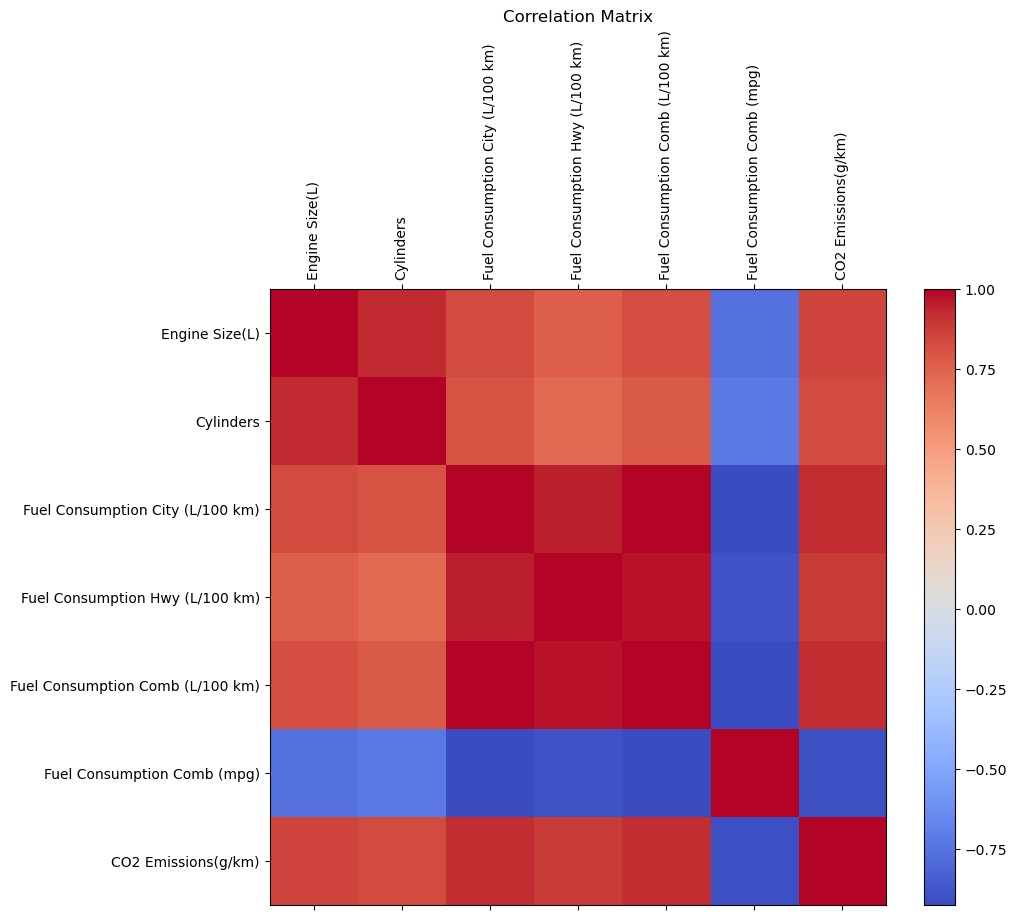

In [58]:
# Correlation matrix heatmap
corr_matrix = numeric_df.corr()

fig, ax = plt.subplots(figsize=(10, 8)) #creating figure and axes
cax = ax.matshow(corr_matrix, cmap='coolwarm')   #ax.matshow works like heatmap in sns

plt.xticks(rotation=45, fontsize=8)

fig.colorbar(cax)  #legend
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)
plt.title("Correlation Matrix")
plt.show()


Observation:
1. Fuel Consumption Comb (mpg) is inversely proportional to most other features.
2. All other features are directly proportional including co2 emissions.


## 7. average CO2 emissions by categorical data

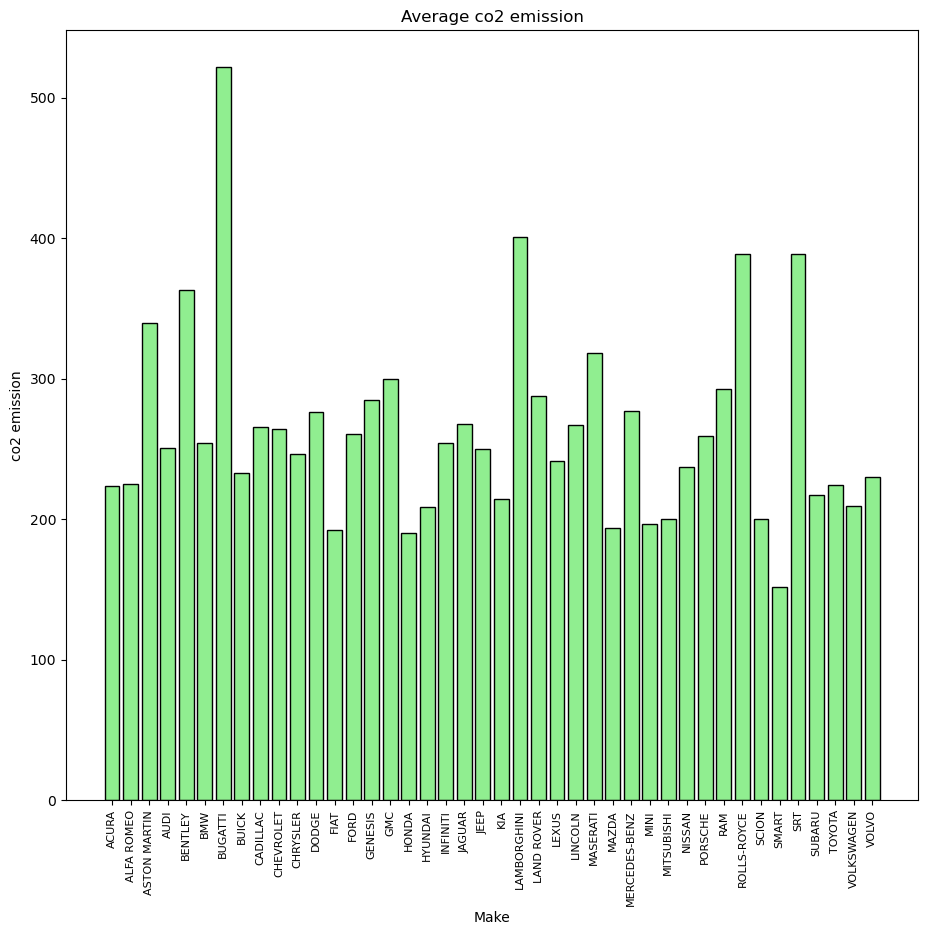

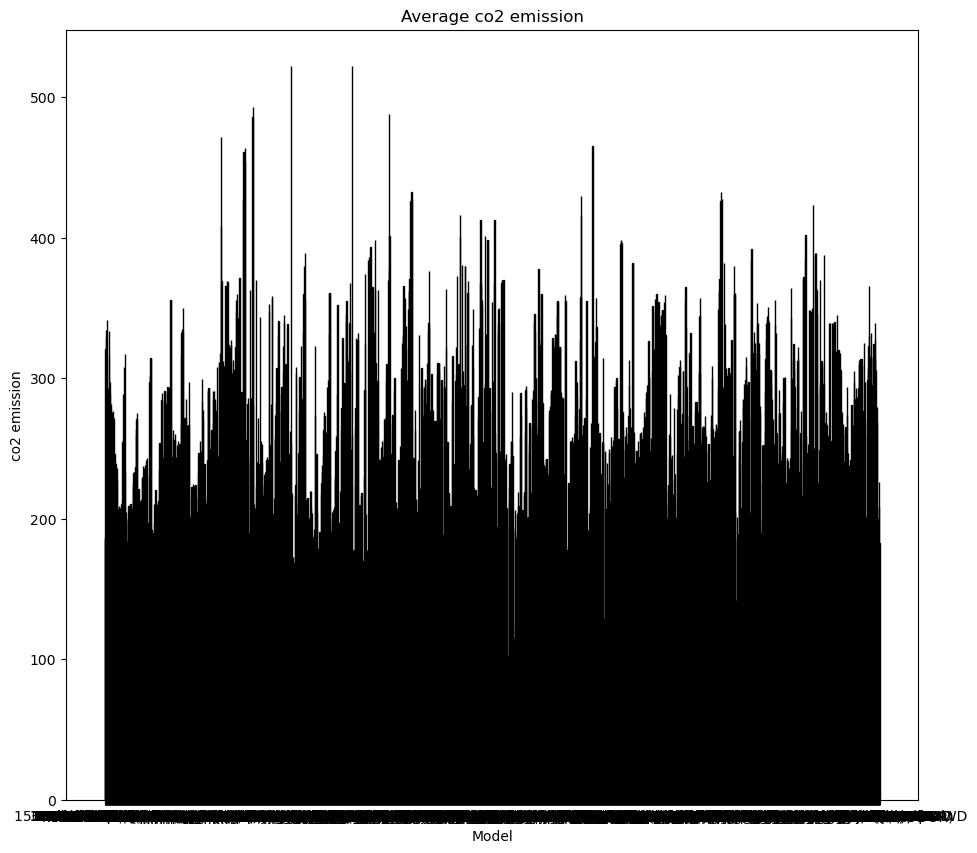

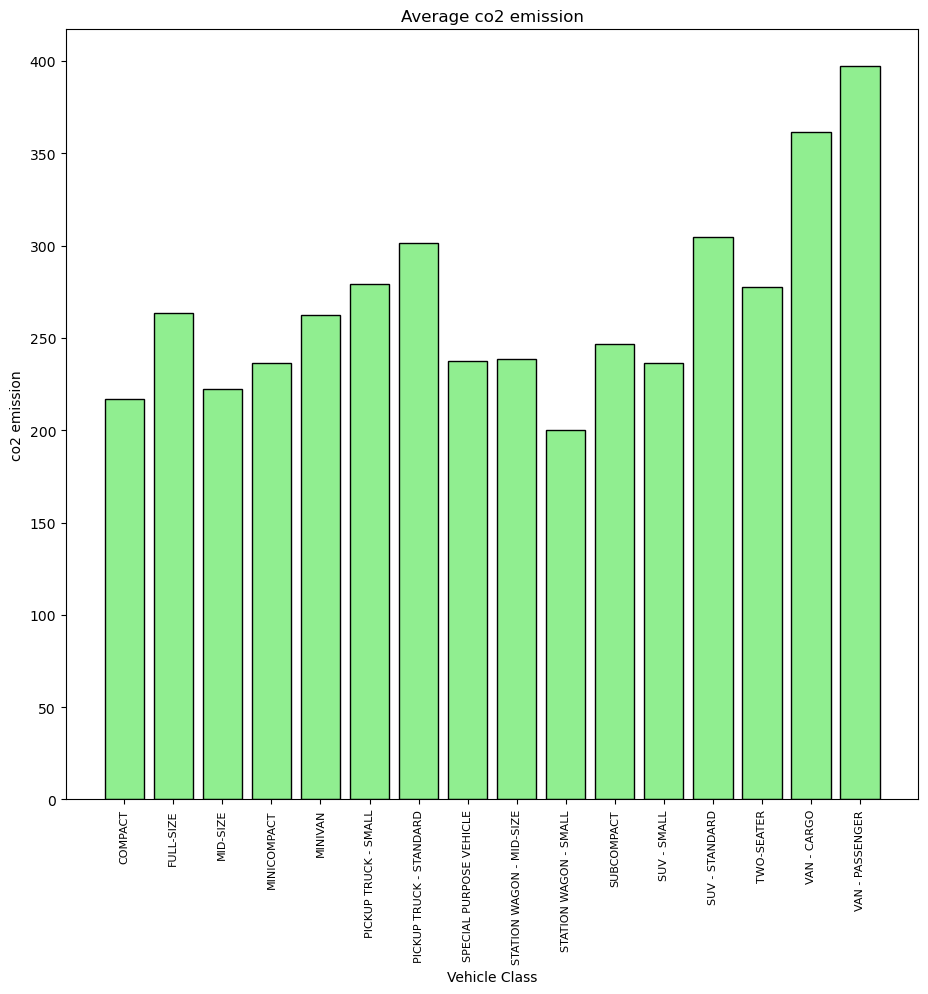

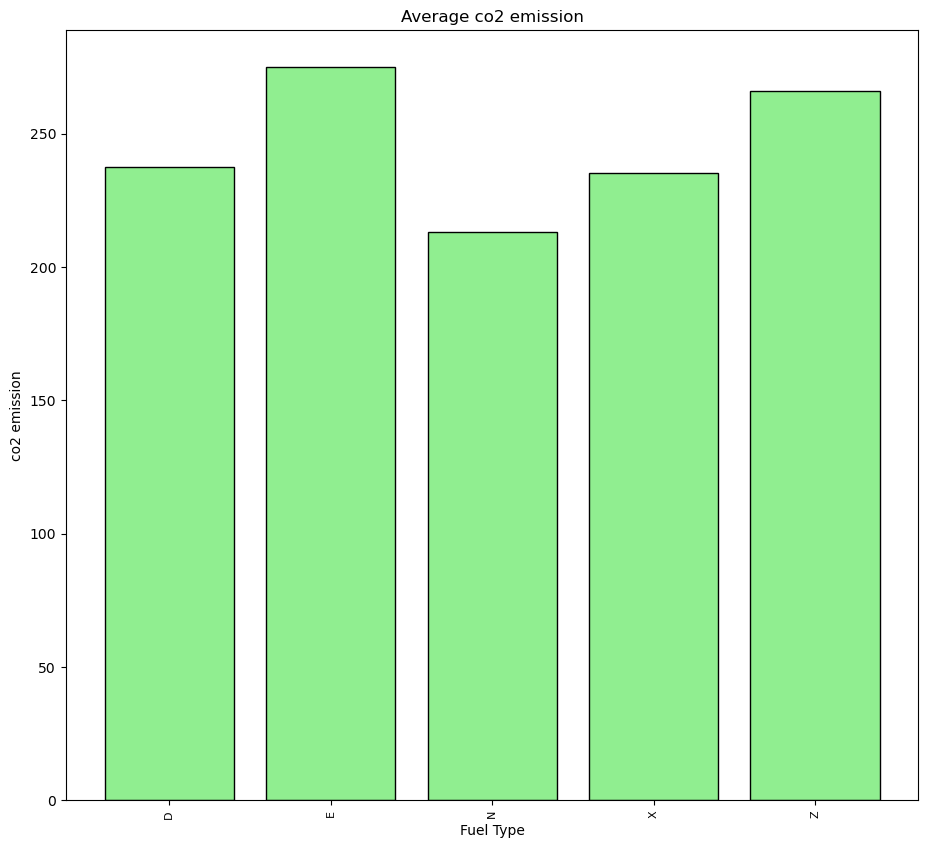

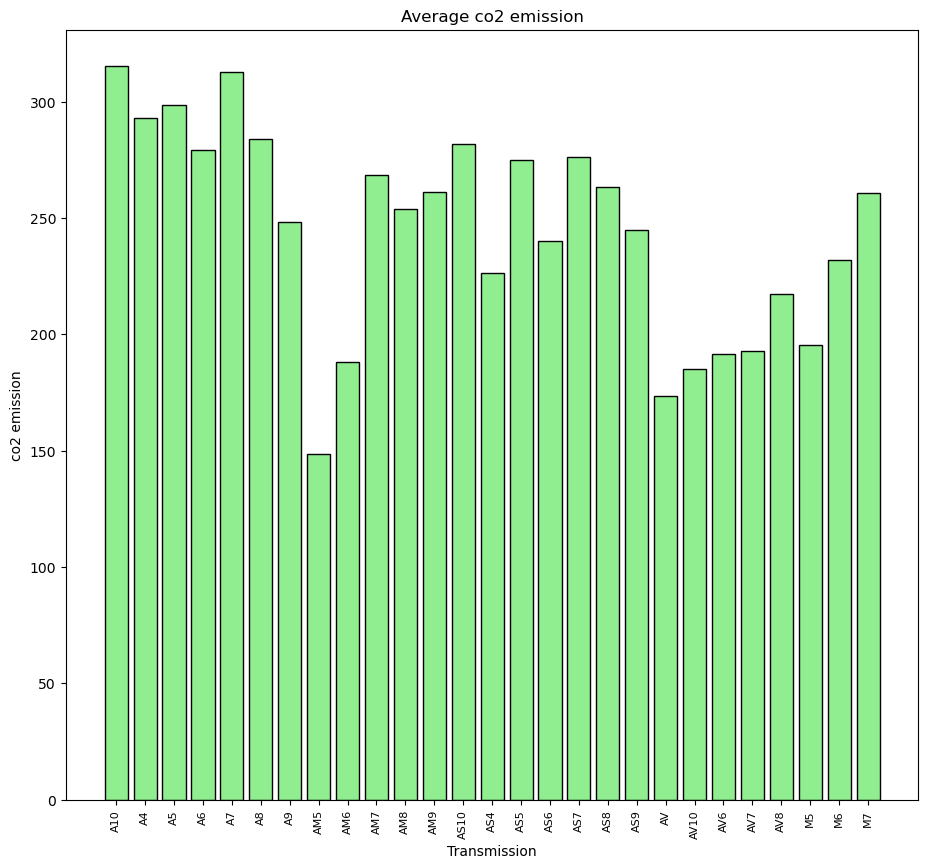

In [83]:
#select non numeric columns
categorical_cols = ['Make', 'Model', 'Vehicle Class', 'Fuel Type', 'Transmission']
for col in categorical_cols:
    avg= df.groupby(col)['CO2 Emissions(g/km)'].mean()
    #avg is a series
    plt.figure(figsize=(11, 10))  
    plt.bar(avg.index, avg.values, color='lightgreen', edgecolor='black')
    plt.title("Average co2 emission")
    plt.xlabel(col)
    plt.ylabel("co2 emission")
    if (col=='Model'):
        ax.set_xticklabels([])
    else:
        plt.xticks(rotation=90, fontsize=8)

    plt.show()

Too many uniques in Model cause only edge color to be seen in the graphs

Observation:
1. Highest CO2 consumption is by Make- Bugatti
2. Highest CO2 consumption is by Vehicle Class- Van Passenger
3. All fuel types have co2 emissions between 200 and 300 with Type E having highest emissions
4. A10 has highest and AM5 has lowest emission in Transmission

## 8. Vehicles with most CO2 emission

In [71]:
high_co= df[df['CO2 Emissions(g/km)']>df['CO2 Emissions(g/km)'].quantile(0.95)]

In [73]:
print(high_co.sort_values('CO2 Emissions(g/km)',ascending=False))

               Make               Model    Vehicle Class  Engine Size(L)  \
5575        BUGATTI              Chiron       TWO-SEATER             8.0   
4509        BUGATTI              CHIRON       TWO-SEATER             8.0   
6640        BUGATTI              Chiron       TWO-SEATER             8.0   
7059    LAMBORGHINI  Aventador Roadster       TWO-SEATER             6.5   
6046    LAMBORGHINI  Aventador Roadster       TWO-SEATER             6.5   
...             ...                 ...              ...             ...   
3436            BMW        M760i xDRIVE        FULL-SIZE             6.6   
2980  MERCEDES-BENZ      AMG S 65 COUPE          COMPACT             6.0   
6683      CHEVROLET          Camaro ZL1       SUBCOMPACT             6.2   
5616      CHEVROLET          Camaro ZL1       SUBCOMPACT             6.2   
5813           FORD         T-150 Wagon  VAN - PASSENGER             3.7   

      Cylinders Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
5575       

## 9. Vehicles with least Fuel consumption

In [77]:
low_f= df[df['Fuel Consumption Comb (L/100 km)']<df['Fuel Consumption Comb (L/100 km)'].quantile(0.05)]
print(low_f.sort_values('Fuel Consumption Comb (L/100 km)'))

           Make            Model Vehicle Class  Engine Size(L)  Cylinders  \
5931    HYUNDAI       IONIQ Blue     FULL-SIZE             1.6          4   
4900    HYUNDAI       IONIQ BLUE     FULL-SIZE             1.6          4   
6950    HYUNDAI       IONIQ Blue     FULL-SIZE             1.6          4   
3824    HYUNDAI       IONIQ BLUE     FULL-SIZE             1.6          4   
6949    HYUNDAI            IONIQ     FULL-SIZE             1.6          4   
...         ...              ...           ...             ...        ...   
3555  CHEVROLET            SPARK    SUBCOMPACT             1.4          4   
979      TOYOTA          COROLLA      MID-SIZE             1.8          4   
3258     TOYOTA  YARIS HATCHBACK       COMPACT             1.5          4   
2139     TOYOTA            YARIS       COMPACT             1.5          4   
1311  CHEVROLET     CRUZE DIESEL      MID-SIZE             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
5931      

## 10. Combining Fuel Consumption Columns
except mpg as its inversely proportional

In [86]:
df['Fuel Consumption Combined (Average)'] = (
    df[['Fuel Consumption City (L/100 km)', 
          'Fuel Consumption Hwy (L/100 km)', 
          'Fuel Consumption Comb (L/100 km)']].mean(axis=1)
)


In [88]:
print(df.head())

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

## 11. Categorising transmission into automatic and manual
A-automatic
M-manual

In [89]:
df['Transmission Type'] = df['Transmission'].str[0].map({'A': 'Automatic', 'M': 'Manual'})


<BarContainer object of 2 artists>

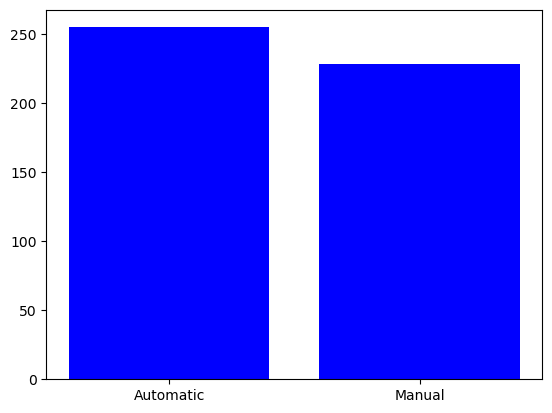

In [91]:
t=df.groupby('Transmission Type')['CO2 Emissions(g/km)'].mean()
plt.bar(t.index,t.values, color='blue')

observation:
Both automatic and manual types have average co2 emission above 200 with automatic being slightly higher

## 12. One-Hot Encode the Fuel Type column


In [95]:
en_fuel = pd.get_dummies(df['Fuel Type'], prefix='Fuel', drop_first=True)
df = pd.concat([df, en_fuel], axis=1)


In [98]:
#pd.get_dummies creates dummy variables
#drop_first- avoid the dummy variable trap
print(df.head())

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  ...  \
0                              6.7                               8.5  ...   
1                              7.7                               9.6  ...   
2    